## Analysing closing price of all stocks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#Firstly, we are going to declare a list of datasets
company_list=['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']

In [6]:
path=r'/Users/jaykay/Desktop/Data Analytics Projects using Python/Data Analytics Project -Python/2-Time Series Data Analysis/individual_stocks_5yr'

In [7]:
pd.read_csv(path+'/'+'AAPL_data.csv')

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [11]:
all_data=pd.DataFrame()
for file in company_list:
    current_data=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_data]) #Update all_data dataset by joining it with current_data datastes
all_data.shape
    
    

(4752, 7)

In [12]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [14]:
#Lets check the data types for each columns
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [15]:
#Next we convert the date in strings to datetime
all_data['date']=pd.to_datetime(all_data['date'])
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [17]:
#Lets the unique company's name
tech_list=all_data['Name'].unique()
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

In [20]:
# car=['kia','audi','bmw','benz','toyota','bentley']
# for i in enumerate(car,1):
#     print(i)

#trying to demonstrate the keyword enumerate

(1, 'kia')
(2, 'audi')
(3, 'bmw')
(4, 'benz')
(5, 'toyota')
(6, 'bentley')


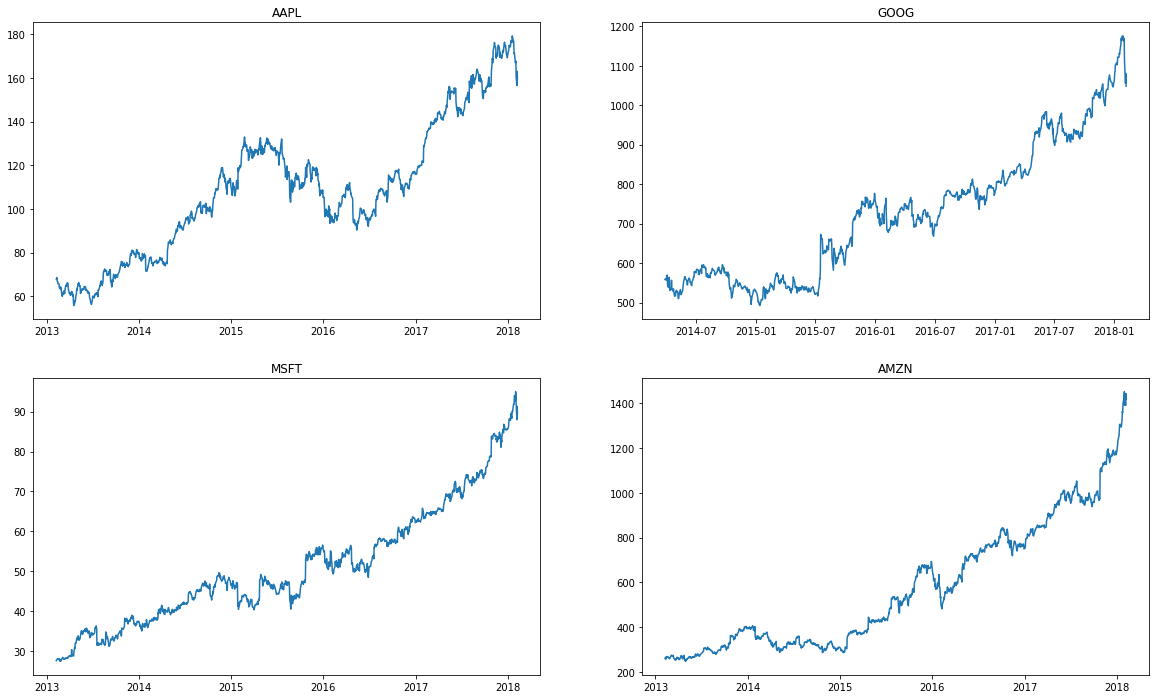

In [31]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    #plt.xticks(rotation='vertical') #This changes the direction of the x axis lableling
    plt.title(company)

## Analyzing the total volume of stock traded per day

In [32]:
#For this problem, we use our plotly library for visualization
import plotly.express as pex

In [35]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    figs=pex.line(df,x='date',y='volume',title=company)
    figs.show()